
- distribution of length of texts by article
- distribution of length of texts in all

- no. of cases per article
- no. of documents per article

- distribution of cases by year

In [1]:
# Data visualization
import matplotlib.pyplot as plt 

# Data manipulation
import pandas as pd
import numpy as np

import re

In [2]:
import sys
sys.path.append(f'../../python')
from grid_search import create_label, balance_unique_id, \
create_balanced_excluded, create_train_test_excluded, group_by_case

In [3]:
df = pd.read_json(r"../../../data/processed/pre-processed_2023_03_11.json")

df.drop_duplicates(subset=['article_new', 'case_num', 'file', 'section_fin'], keep='first', inplace=True)
df=df.reset_index(drop=True)

In [4]:
# Define a regular expression pattern to match the unwanted words
remove_words = ['statement objection', 'en', 'phase ii', 'rfi', 'request information',
                'european commission', 'commission européenne bruxelles', 'europese commissie brussel', 'belgium telephone',
                'confidential information disclosed', 'bruxelles europese', 'européenne', 'commissie', 'europese', 'tele', 'brussel', 'bruxelles',
                'belgique', 'tel', 'belgïë',
                'enclosed square bracket', 'marked asterisk']
remove_pattern = re.compile(r'\b(' + '|'.join(remove_words) + r')\b', flags=re.IGNORECASE)
df['text_clean'] = df['text_clean'].replace(remove_pattern, '', regex=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8769 entries, 0 to 8768
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         8769 non-null   int64 
 1   article_new  8769 non-null   object
 2   case_num     8769 non-null   object
 3   file         8769 non-null   object
 4   section_fin  8769 non-null   object
 5   len_pdf      8769 non-null   int64 
 6   sec_text     8769 non-null   object
 7   count        8769 non-null   int64 
 8   text_clean   8769 non-null   object
 9   count_text   8769 non-null   int64 
 10  phase2       8769 non-null   object
 11  wc           8769 non-null   object
 12  competition  8769 non-null   object
dtypes: int64(4), object(9)
memory usage: 890.7+ KB


In [6]:
len(df[df['len_pdf']<=5])

3194

In [7]:
# no of cases by article_new
df.groupby('article_new')['case_num'].nunique().sort_index()

article_new
article6(1)(b)    1284
article6(2)        201
article8(1)         32
article8(2)         57
article8(3)          9
referral            59
simplified        3194
Name: case_num, dtype: int64

In [8]:
# no of documents by article_new
df.groupby('article_new')['file'].nunique().sort_index()

article_new
article6(1)(b)    1286
article6(2)        202
article8(1)         32
article8(2)         57
article8(3)          9
referral            92
simplified        3194
Name: file, dtype: int64

In [9]:
# no of rows by article
df['article_new'].value_counts().sort_index()

article6(1)(b)    4415
article6(2)        664
article8(1)         94
article8(2)        170
article8(3)         28
referral           204
simplified        3194
Name: article_new, dtype: int64

In [21]:
df['section_fin'].value_counts().sort_index()

Competitive Assessment       1354
Concentration & Dimension    1602
Market Definition            1087
Parties & Operation          1532
simplified                   3194
Name: section_fin, dtype: int64

In [10]:
# no of cases by year
df.groupby('year')['case_num'].nunique()

year
2004     99
2005    232
2006    277
2007    303
2008    241
2009    178
2010    203
2011    254
2012    174
2013    198
2014    232
2015    261
2016    303
2017    264
2018    335
2019    319
2020    305
2021    337
2022    287
2023      6
Name: case_num, dtype: int64

Labels

In [22]:
from sklearn.preprocessing import LabelEncoder

def create_label(data, label_name):
    df = data.copy()

    df1 = df[df[label_name].isin([0,1])].reset_index(drop=True)

    le = LabelEncoder()
    df1['label'] = le.fit_transform(df1[label_name])

    return(df1)

In [26]:
data = df.copy()
data = data[data['section_fin']=="Competitive Assessment"]
label_name = "phase2"
df1 = create_label(data, label_name)
df_unique = balance_unique_id(df1)
df_balanced_unique, df_balanced, df_excluded = create_balanced_excluded(df_unique, df1)
df_train, df_test, df_test1 = create_train_test_excluded(df_balanced, df_balanced_unique, df_excluded)

Total decisions: 1331
0    1256
1      75
Name: label, dtype: int64
Balancing...
Total decisions: 150
Labels distribution: 
 1    75
0    75
Name: 0, dtype: int64
Training set shape: (120,) (120,)
Test set shape: (30,) (30,)
Creating df_train 1: 60 0: 60
Creating df_test1 1: 15 0: 15
Creating df_test concatenated with df_excluded with len: 1181
Creating df_test 1: 15 0: 1196


In [17]:
data = df.copy()
label_name = "wc"
df1 = create_label(data, label_name)
df_unique = balance_unique_id(df1)
df_balanced_unique, df_balanced, df_excluded = create_balanced_excluded(df_unique, df1)
df_train, df_test, df_test1 = create_train_test_excluded(df_balanced, df_balanced_unique, df_excluded)

Total decisions: 1574
0    1316
1     258
Name: label, dtype: int64
Balancing...
Total decisions: 516
Labels distribution: 
 0    258
1    258
Name: 0, dtype: int64
Training set shape: (412,) (412,)
Test set shape: (104,) (104,)
Creating df_train 1: 206 0: 206
Creating df_test1 1: 52 0: 52
Creating df_test concatenated with df_excluded with len: 1058
Creating df_test 1: 52 0: 1110


In [20]:
data = df.copy()
label_name = "competition"
df1 = create_label(df, label_name)
df_unique = balance_unique_id(df1)
df_balanced_unique, df_balanced, df_excluded = create_balanced_excluded(df_unique, df1)
df_train, df_test, df_test1 = create_train_test_excluded(df_balanced, df_balanced_unique, df_excluded)

Total decisions: 1583
1    1316
0     267
Name: label, dtype: int64
Balancing...
Total decisions: 534
Labels distribution: 
 1    267
0    267
Name: 0, dtype: int64
Training set shape: (427,) (427,)
Test set shape: (107,) (107,)
Creating df_train 1: 213 0: 213
Creating df_test1 1: 54 0: 53
Creating df_test concatenated with df_excluded with len: 1049
Creating df_test 1: 1103 0: 53


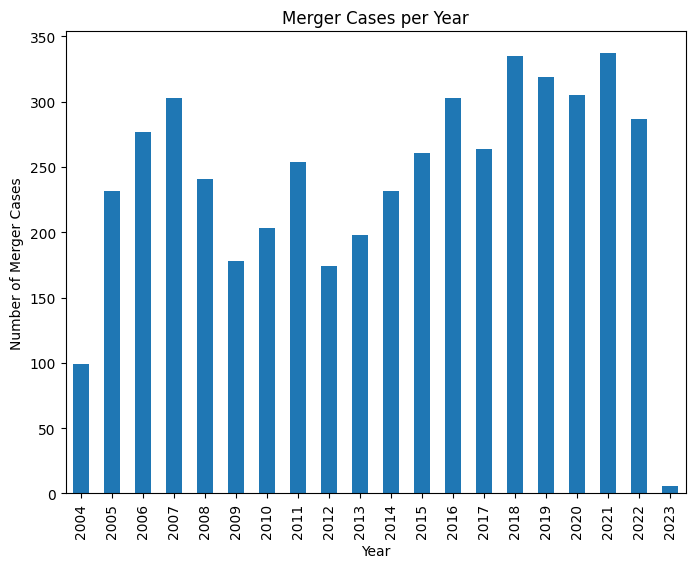

In [137]:
import matplotlib.pyplot as plt

# Group the DataFrame by year_text and count the number of unique case_num values
grouped = df.groupby('year')['case_num'].nunique()

# Create a bar chart of the grouped data
ax = grouped.plot(kind='bar', figsize=(8,6))

# Set the chart title and axis labels
ax.set_title('Merger Cases per Year')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Merger Cases')

# Display the chart
plt.show()

### Distribution of length of texts

<AxesSubplot: >

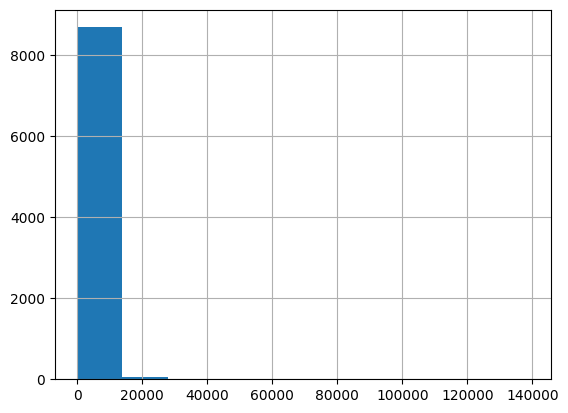

In [138]:
pd.Series(df['count_text']).hist(bins = 10)


Distribution without simplified and referral

<AxesSubplot: >

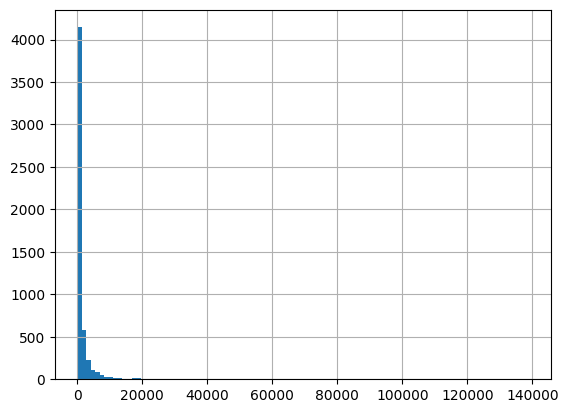

In [139]:
pd.Series(df[~df['article_new'].isin(['referral','simplified'])]['count_text']).hist(bins = 100)

In [140]:
len(df[~df['article_new'].isin(['referral','simplified'])]['count_text'])

5371

In [141]:
len(df[~df['article_new'].isin(['referral','simplified'])]['count_text'])/len(df.index)

0.612498574523891

<AxesSubplot: >

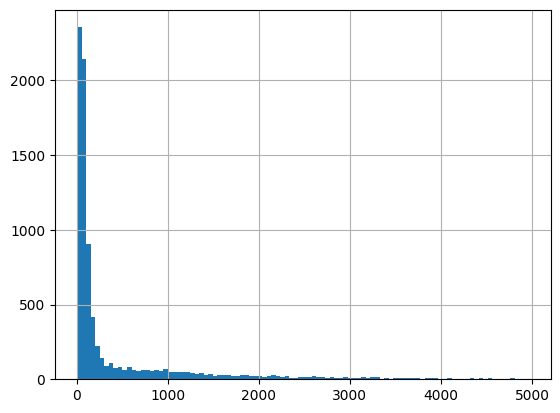

In [142]:
pd.Series(df[df['count_text']<5000]['count_text']).hist(bins = 100)

<AxesSubplot: >

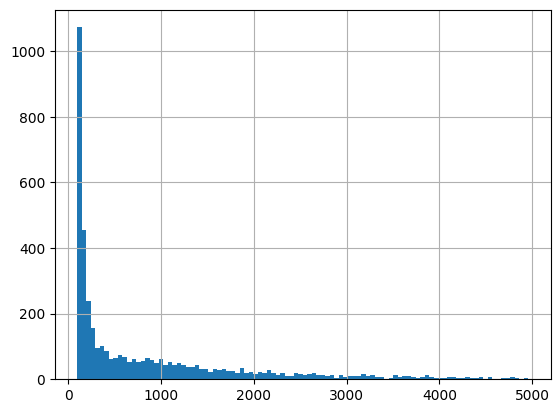

In [143]:
pd.Series(df[(df['count_text'] >= 100) & (df['count_text'] <= 5000)]['count_text']).hist(bins = 100)

In [144]:
len(df[(df['count_text'] >= 21) & (df['count_text'] <= 5000)])


8095

In [145]:
print(len(df[(df['count_text'] >= 100) & (df['count_text'] <= 5000)])/len(df.index))

0.47724940130003424


In [146]:
df[(df['count_text'] > 5000)]['sec_text']

7        A. General overview\ni) Pre-press printing tec...
121      A.  Relevant markets\n9.  The parties claim th...
134      28.  News Corp and BSkyB are active in various...
331      7.  The  main  markets  concerned  with  the  ...
580      V.3.1 (cid:150) INTRODUCTION\nV.3.1.1 (cid:150...
                               ...                        
10750    4.1.  Legal framework\n(101)  When the parties...
10754    (7)  The Parties’ activities overlap in aerosp...
10755    5.1.  Legal framework\n(114)  Under paragraphs...
10759    4.1.  Introduction\n(6)  The Parties are activ...
10768    5.1.  Quay cranes\n(38)  Quay cranes are crane...
Name: sec_text, Length: 359, dtype: object

In [147]:
print("min:", min(df['count_text']), 
    "\nmax:", max(df['count_text']))

min: 9 
max: 138766


In [148]:
df[df['count_text']==max(df['count_text'])]

,year,article_new,case_num,file,section_fin,len_pdf,sec_text,count,text_clean,count_text,phase2,wc,competition
10231,2021,article8(2),M.9564,\M_9564_7982342_9230_3,Competitive Assessment,810,(705) Under Article 2(2) and (3) of the Merge...,238795,article merger regulation commission ass propo...,138766,1,1,0
